# Load Libraries

In [42]:
#pip install missingno

SyntaxError: invalid syntax (<ipython-input-42-22c2fb9cdabb>, line 2)

In [43]:
#pip install cufflinks

  Using cached https://files.pythonhosted.org/packages/9a/53/f696e4480b1d1de3b1523991dea71cf417c8b19fe70c704da164f3f90972/colorlover-0.3.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/44/ef/beae4b4ef80902f22e3af073397f079c96969c69b2c7d52a57ea9ae61c9d/retrying-1.3.3.tar.gz
  Created wheel for cufflinks: filename=cufflinks-0.17.3-cp37-none-any.whl size=68730 sha256=8901d687045303424d739743c02e39f2b1d0cfd56ef21bc2d0b459783b469b7d
  Stored in directory: C:\Users\DiDi\AppData\Local\pip\Cache\wheels\7d\ba\8d\38b672c3e40d8bd22dd60b8e6e29965b43f2b4be4d064e44d5
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=b9cd512bee3ee8ae1cf6601d1b7e37a7a389fd4428b9cf0d32f53e95ca220e16
  Stored in directory: C:\Users\DiDi\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built cufflinks retrying
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import os
import seaborn as sns
import cufflinks as cf
cf.go_offline()

# Load File

In [2]:
os.getcwd()

'C:\\Users\\DiDi\\Documents\\Deni\\Diplomado\\Cuarto Módulo\\Practica_1'

In [3]:
df= pd.read_csv('UCI_Credit_Card.csv')

In [4]:
df.head(7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [5]:
df.tail(7)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29993,29994,100000.0,1,1,2,38,0,-1,-1,0,...,70626.0,69473.0,55004.0,2000.0,111784.0,4000.0,3000.0,2000.0,2000.0,0
29994,29995,80000.0,1,2,2,34,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


# EDA (Exploratory Data Analysis)

In [6]:
df.shape

(30000, 25)

Number of rows

In [7]:
df.shape[0]

30000

Number of columns

In [8]:
df.shape[1]

25

Column names

In [9]:
df.columns.values.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [11]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


 Seems like data have many outliers, for example the column "LIMIT_BAL". We'll land it in the next practice

Null percentage

In [12]:
df.isnull().sum()/df.shape[0]

ID                            0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

Null percentage visually

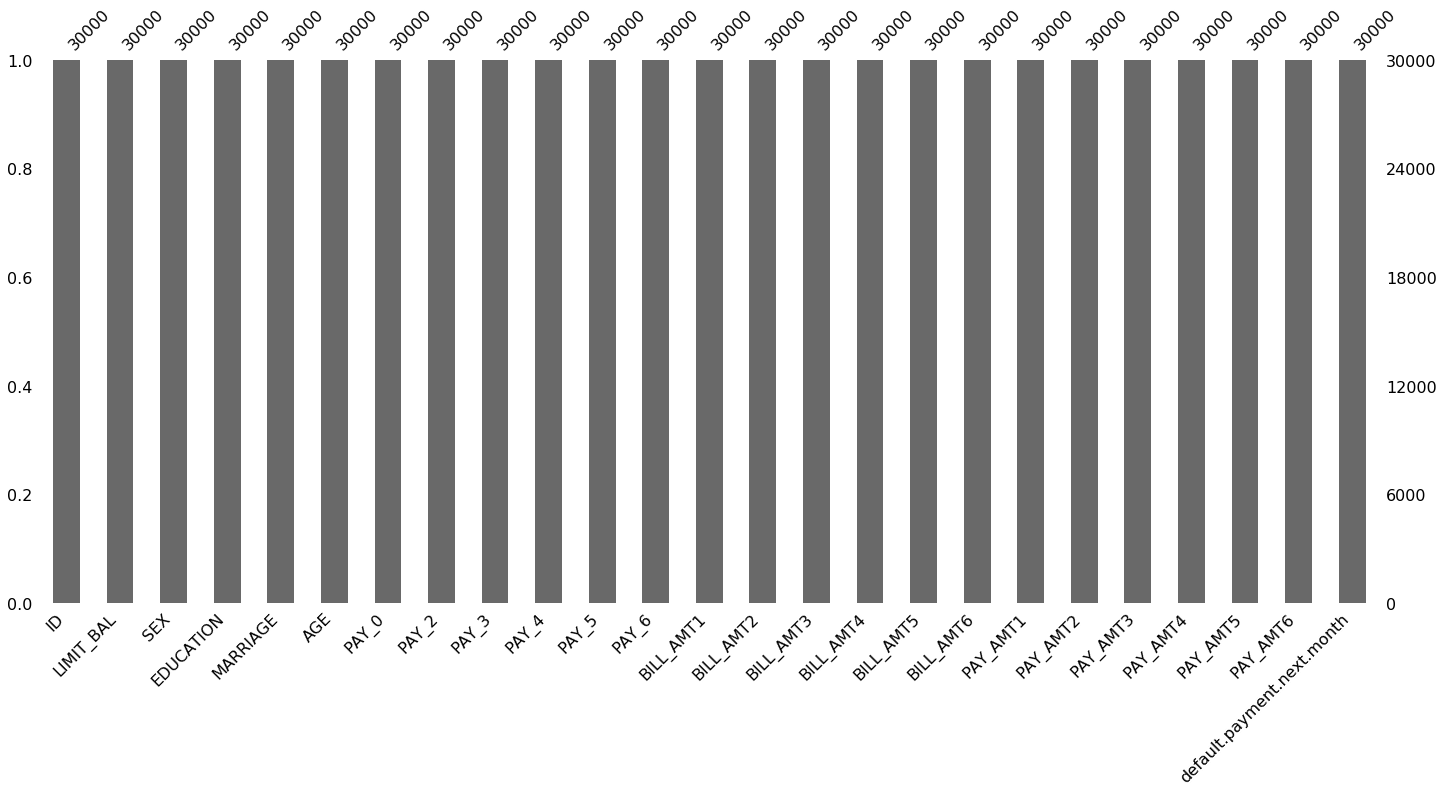

In [13]:
msno.bar(df)

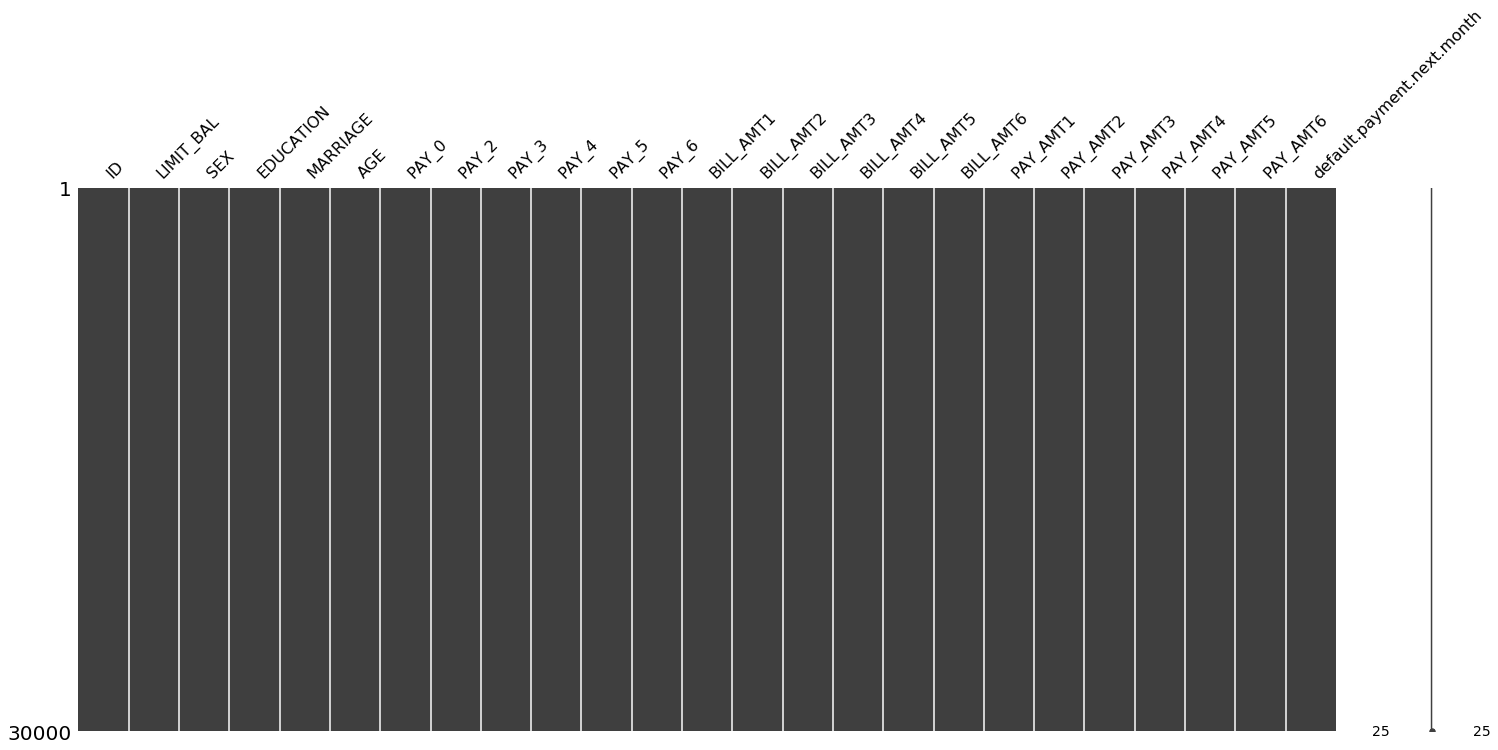

In [14]:
msno.matrix(df)

Check the sample unit

In [15]:
df.nunique()/df.shape[0]

ID                            1.000000
LIMIT_BAL                     0.002700
SEX                           0.000067
EDUCATION                     0.000233
MARRIAGE                      0.000133
AGE                           0.001867
PAY_0                         0.000367
PAY_2                         0.000367
PAY_3                         0.000367
PAY_4                         0.000367
PAY_5                         0.000333
PAY_6                         0.000333
BILL_AMT1                     0.757433
BILL_AMT2                     0.744867
BILL_AMT3                     0.734200
BILL_AMT4                     0.718267
BILL_AMT5                     0.700333
BILL_AMT6                     0.686800
PAY_AMT1                      0.264767
PAY_AMT2                      0.263300
PAY_AMT3                      0.250600
PAY_AMT4                      0.231233
PAY_AMT5                      0.229900
PAY_AMT6                      0.231300
default.payment.next.month    0.000067
dtype: float64

The "ID" is the sample unit

Reviewing the type of data that are inside the columns (series)

In [16]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

## Correlation

 Correlation matrix plot

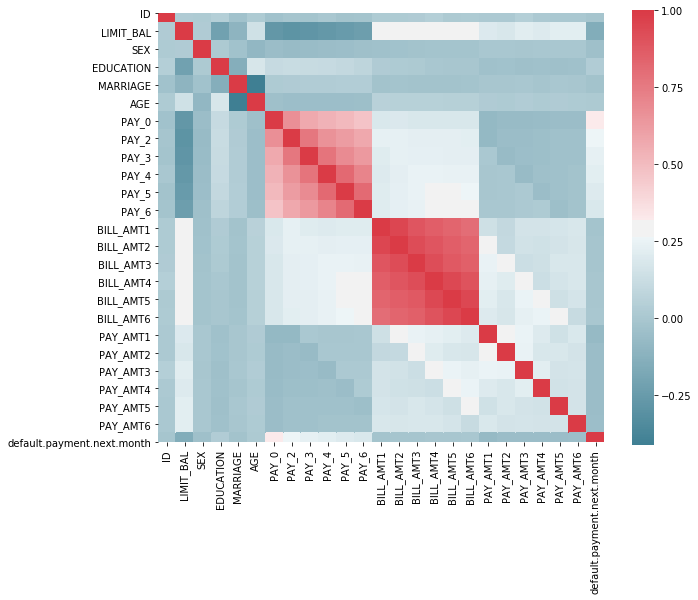

In [17]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

We can see that the variables that have the highest positive correlation are between any combination of pay and bill, for example 'PAY_0' is strongly correlated with 'PAY_3'.

Scatter Plots

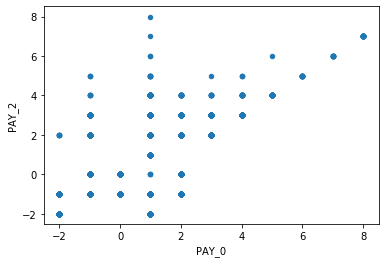

In [18]:
df.plot(kind='scatter',x='PAY_0',y='PAY_2')

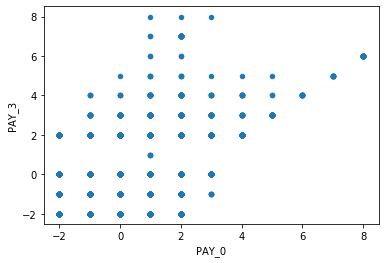

In [19]:
df.plot(kind='scatter',x='PAY_0',y='PAY_3')

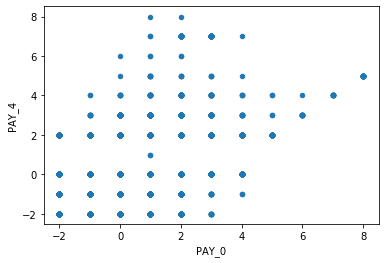

In [20]:
df.plot(kind='scatter',x='PAY_0',y='PAY_4')

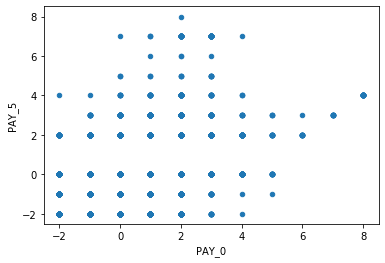

In [21]:
df.plot(kind='scatter',x='PAY_0',y='PAY_5')

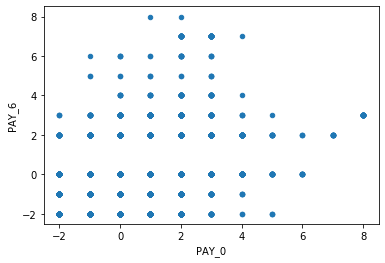

In [22]:
df.plot(kind='scatter',x='PAY_0',y='PAY_6')

From the previous scatter plots we can see the effect that we observe in the correlation matrix plot, the strongest correlation is given between 'PAY_0' and 'PAY_2' while the weakest correlation is given by 'PAY_0' and 'PAY_6'. This case is similar for the 'BILL_AMT' variables. 

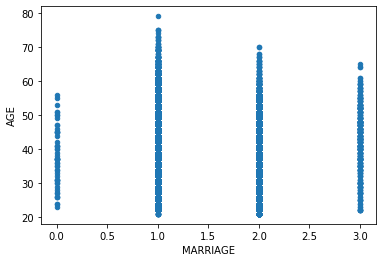

In [23]:
df.plot(kind='scatter',x='MARRIAGE',y='AGE')

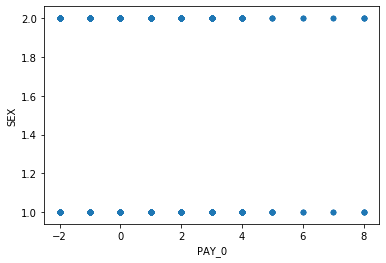

In [24]:
df.plot(kind='scatter',x='PAY_0',y='SEX')

## Histograms

In [25]:
df.columns.to_list()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

Count Values for variable 'EDUCATION'

In [26]:
df['EDUCATION'].value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

A histogram will help us obtain the above visually

Text(0.5, 1.0, 'Frequency of education')

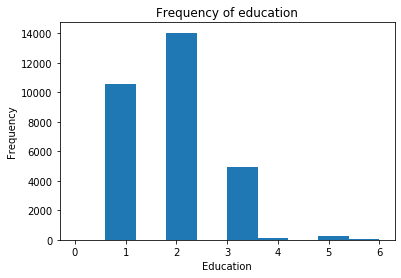

In [33]:
plt.hist(df['EDUCATION'])
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Frequency of education')

We'll do the same histogram but using iplot. You can do zoom in the histogram ... Awesome!

In [29]:
df['EDUCATION'].iplot(kind='histogram');

We known that EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown), so the most often value is university and the value with lowest frequency is graduate school. 

Text(0.5, 1.0, 'Frequency of sex')

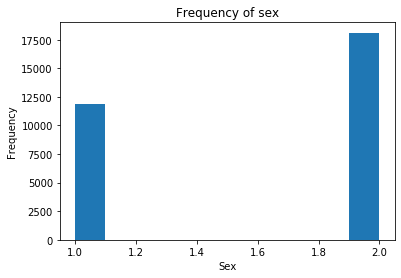

In [34]:
plt.hist(df['SEX'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Frequency of sex')

In [35]:
df['SEX'].iplot(kind='histogram');

In the last histogram it seems that the variable 'SEX' is continuous, we are going to verify this by counting the values of the variable. 

In [36]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

SEX: Gender (1=male, 2=female), The sex with highest frequency is female

Text(0.5, 1.0, 'Frequency of marriage')

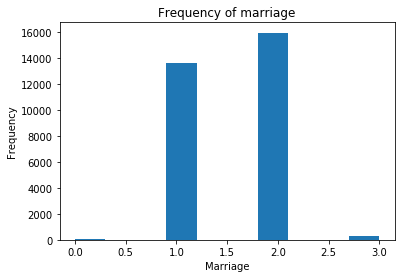

In [40]:
plt.hist(df['MARRIAGE'])
plt.xlabel('Marriage')
plt.ylabel('Frequency')
plt.title('Frequency of marriage')

MARRIAGE: Marital status (1=married, 2=single, 3=others). The value "single" is the most repeated. 

Text(0.5, 1.0, 'Frequency of age')

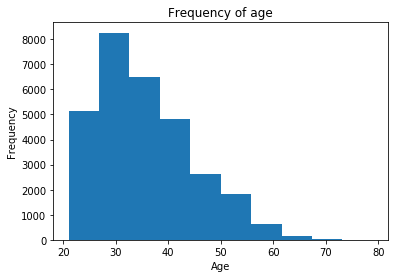

In [41]:
plt.hist(df['AGE'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of age')

In [45]:
df['AGE'].iplot(kind='histogram');

In this case, we have more categorias for the variable age, so it´s more dificult to say which value have the highest frequency.

In [48]:
df['AGE'].min()

21

In [49]:
df['AGE'].max()

79

We're going to define a function to segment the age by ranges.

In [53]:
def segment(age):
    categoria=None
    if 21<=age<=29:
        categoria='age_20'
    elif 30<=age<=39:
        categoria='age_30'
    elif 40<=age<=49:
        categoria='age_40'
    elif 50<=age<=59:
        categoria='age_50'
    elif 60<=age<=69:
        categoria='age_60'
    elif 70<=age<=79:
        categoria='age_70'
        
    return categoria

Mapping the function to the column 'AGE'

In [54]:
df['RANGE_AGE']=df['AGE'].map(segment)

Count Values for variable 'RANGE_AGE'

In [58]:
df['RANGE_AGE'].value_counts()

age_30    11238
age_20     9618
age_40     6464
age_50     2341
age_60      314
age_70       25
Name: RANGE_AGE, dtype: int64

The age segment of the 30's has the highest frequency.